In [ ]:
import cv2
import numpy as np
from glob import glob

# Paths
fragment = "124_001"
i1_path = f"/content/drive/MyDrive/Colab Notebooks/icdar_ijdar_2025/qumran_segmentation_dataset/multispectral_images/{fragment}_001.tif"
i12_path = f"/content/drive/MyDrive/Colab Notebooks/icdar_ijdar_2025/qumran_segmentation_dataset/multispectral_images/{fragment}_012.tif"

ink_mask_path = f"/content/drive/MyDrive/Colab Notebooks/icdar_ijdar_2025/ink_masks/{fragment}.png"
parchment_mask_path = f"/content/drive/MyDrive/Colab Notebooks/icdar_ijdar_2025/parchment_masks/{fragment}.png"

# Load images
i1 = cv2.imread(i1_path, cv2.IMREAD_UNCHANGED).astype(np.float64)
i12 = cv2.imread(i12_path, cv2.IMREAD_UNCHANGED).astype(np.float64)
i12_minus_i1 = i12 - i1

# Load masks
ink_mask = cv2.imread(ink_mask_path, cv2.IMREAD_GRAYSCALE) > 0
parchment_mask = cv2.imread(parchment_mask_path, cv2.IMREAD_GRAYSCALE) > 0

# Extract pixel values for each region
def get_region_values(band, mask):
    return band[mask]

# Intensity values by region and specific bands/differences
regions = {
    "parchment": get_region_values(i12_minus_i1, parchment_mask),
    "ink_band1": get_region_values(i1, ink_mask),
    "ink_band_diff": get_region_values(i12_minus_i1, ink_mask)
}

# Define percentiles to evaluate
percentiles = [6, 8, 10, 12, 14]

# Calculate and print thresholds for each percentile
for n in percentiles:
    print(f"\nThresholds for n = {n} percentiles:")

    # Parchment thresholds for band12 - band1
    parchment_thresholds = (np.percentile(regions["parchment"], n), np.percentile(regions["parchment"], 100 - n))
    print(f"Parchment thresholds for band12 - band1 ({n}th-{100 - n}th percentile): {parchment_thresholds}")

    # Ink thresholds for band1 and band12 - band1
    ink_band1_thresholds = (np.percentile(regions["ink_band1"], n), np.percentile(regions["ink_band1"], 100 - n))
    ink_band_diff_thresholds = (np.percentile(regions["ink_band_diff"], n), np.percentile(regions["ink_band_diff"], 100 - n))

    print(f"Ink thresholds for band1 ({n}th-{100 - n}th percentile): {ink_band1_thresholds}")
    print(f"Ink thresholds for band12 - band1 ({n}th-{100 - n}th percentile): {ink_band_diff_thresholds}")



Thresholds for n = 6 percentiles:
Parchment thresholds for band12 - band1 (6th-94th percentile): (156.0, 1230.0)
Ink thresholds for band1 (6th-94th percentile): (87.0, 163.0)
Ink thresholds for band12 - band1 (6th-94th percentile): (71.0, 310.0)

Thresholds for n = 8 percentiles:
Parchment thresholds for band12 - band1 (8th-92th percentile): (219.0, 1202.0)
Ink thresholds for band1 (8th-92th percentile): (90.0, 156.0)
Ink thresholds for band12 - band1 (8th-92th percentile): (75.0, 294.0)

Thresholds for n = 10 percentiles:
Parchment thresholds for band12 - band1 (10th-90th percentile): (313.0, 1179.0)
Ink thresholds for band1 (10th-90th percentile): (92.0, 150.0)
Ink thresholds for band12 - band1 (10th-90th percentile): (78.0, 280.0)

Thresholds for n = 12 percentiles:
Parchment thresholds for band12 - band1 (12th-88th percentile): (403.0, 1159.0)
Ink thresholds for band1 (12th-88th percentile): (94.0, 146.0)
Ink thresholds for band12 - band1 (12th-88th percentile): (81.0, 267.0)

Thr

In [ ]:
!pip install pymaxflow

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 798.4/798.4 kB 11.5 MB/s eta 0:00:00


In [ ]:
import os
import cv2
import numpy as np
import matplotlib.pyplot as plt
import maxflow

# List of fragments to process
fragments = [
    '124_001', '124_002', '124_004', '124_005', '124_006', '124_007', '124_008', '124_009',
    '198_006', '198_007', '690_003', '690_004', '690_007', '690_008', '690_011', '690_014',
    '690_015', '690_016', '690_018', '690_019'
]

# Base paths
input_base = "/content/drive/MyDrive/Colab Notebooks/icdar_ijdar_2025/qumran_segmentation_dataset/multispectral_images/"
output_base = "/content/drive/MyDrive/Colab Notebooks/icdar_ijdar_2025/"

def create_mask(i1, i12, conditions):
    mask = np.ones_like(i1, dtype=bool)
    for cond in conditions:
        mask &= cond
    result = np.zeros_like(i1)
    result[mask] = 255
    return np.uint8(result)

fragment = '124_006'
# Load images
i1_path = os.path.join(input_base, fragment + "_001.tif")
i12_path = os.path.join(input_base, fragment + "_012.tif")
i1 = cv2.imread(i1_path, cv2.IMREAD_UNCHANGED).astype(np.float64)
i12 = cv2.imread(i12_path, cv2.IMREAD_UNCHANGED).astype(np.float64)





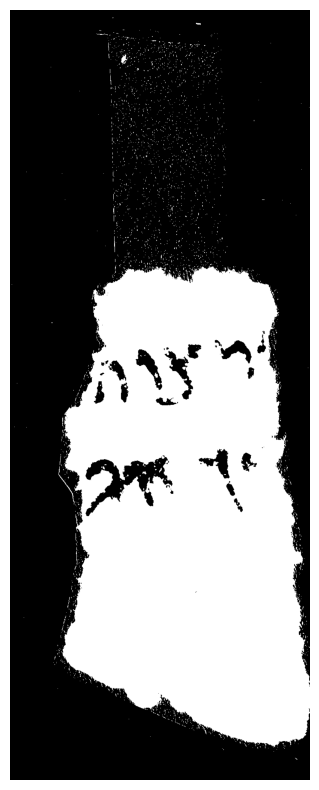

True

In [ ]:
parchment_mask = create_mask(i1, i12, [
    i12 - i1 > 156
])
plt.figure(figsize=(10, 10))
plt.imshow(parchment_mask, cmap='gray')
plt.axis('off')
plt.show()
cv2.imwrite('par_6.png', parchment_mask)

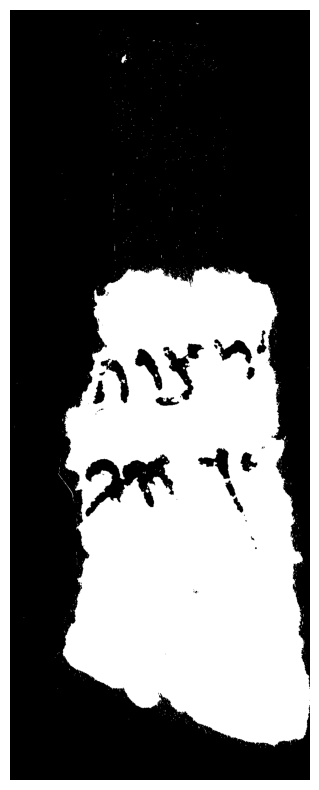

True

In [ ]:
parchment_mask = create_mask(i1, i12, [
    i12 - i1 > 219
])
plt.figure(figsize=(10, 10))
plt.imshow(parchment_mask, cmap='gray')
plt.axis('off')
plt.show()
cv2.imwrite('par_8.png', parchment_mask)

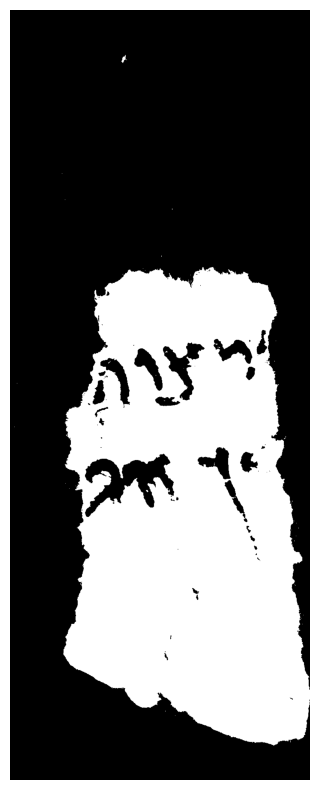

True

In [ ]:
parchment_mask = create_mask(i1, i12, [
    i12 - i1 > 313
])
plt.figure(figsize=(10, 10))
plt.imshow(parchment_mask, cmap='gray')
plt.axis('off')
plt.show()
cv2.imwrite('par_10.png', parchment_mask)


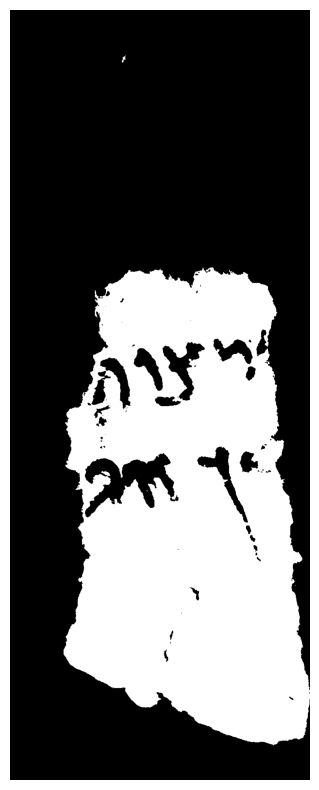

True

In [ ]:
parchment_mask = create_mask(i1, i12, [
    i12 - i1 > 403
])
plt.figure(figsize=(10, 10))
plt.imshow(parchment_mask, cmap='gray')
plt.axis('off')
plt.show()
cv2.imwrite('par_12.png', parchment_mask)


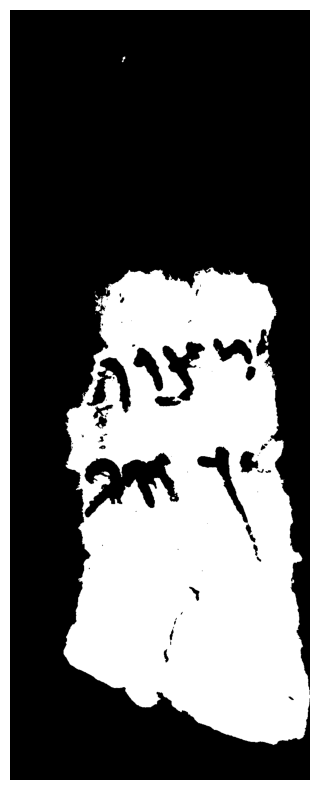

True

In [ ]:
parchment_mask = create_mask(i1, i12, [
    i12 - i1 > 476
])
plt.figure(figsize=(10, 10))
plt.imshow(parchment_mask, cmap='gray')
plt.axis('off')
plt.show()
cv2.imwrite('par_14.png', parchment_mask)

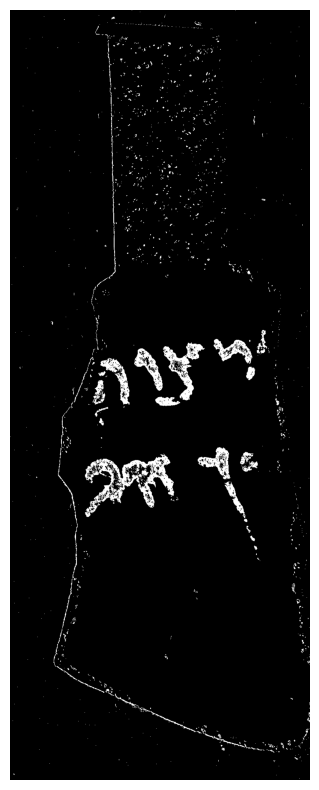

True

In [ ]:

ink_mask = create_mask(i1, i12, [
    i1 > 87, i1 <= 163, i12 - i1 > 71, i12 - i1 <= 310,
])

plt.figure(figsize=(10, 10))
plt.imshow(ink_mask, cmap='gray')
plt.axis('off')
plt.show()
cv2.imwrite('ink_6.png', ink_mask)



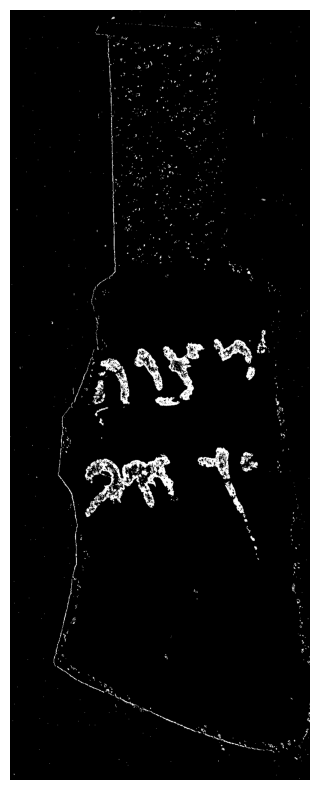

True

In [ ]:
ink_mask = create_mask(i1, i12, [
    i1 > 90, i1 <= 156, i12 - i1 > 75, i12 - i1 <= 294,
])

plt.figure(figsize=(10, 10))
plt.imshow(ink_mask, cmap='gray')
plt.axis('off')
plt.show()
cv2.imwrite('ink_8.png', ink_mask)

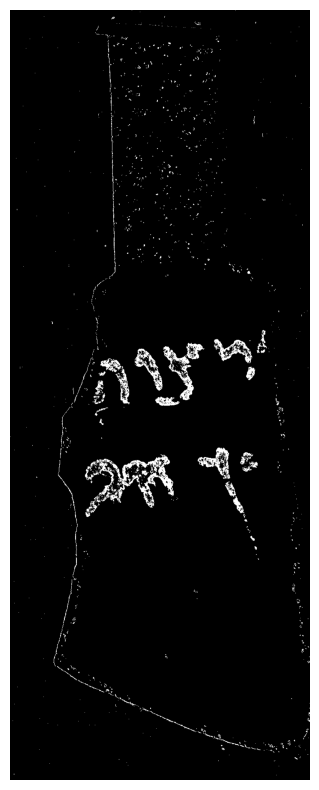

True

In [ ]:
ink_mask = create_mask(i1, i12, [
 i1 > 92, i1 <= 150, i12 - i1 > 78, i12 - i1 <= 280
])

plt.figure(figsize=(10, 10))
plt.imshow(ink_mask, cmap='gray')
plt.axis('off')
plt.show()
cv2.imwrite('ink_10.png', ink_mask)


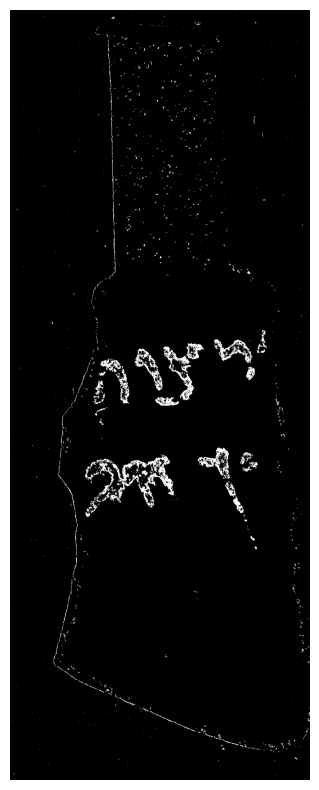

True

In [ ]:
ink_mask = create_mask(i1, i12, [
 i1 > 94, i1 <= 146, i12 - i1 > 81, i12 - i1 <= 267
])

plt.figure(figsize=(10, 10))
plt.imshow(ink_mask, cmap='gray')
plt.axis('off')
plt.show()
cv2.imwrite('ink_12.png', ink_mask)

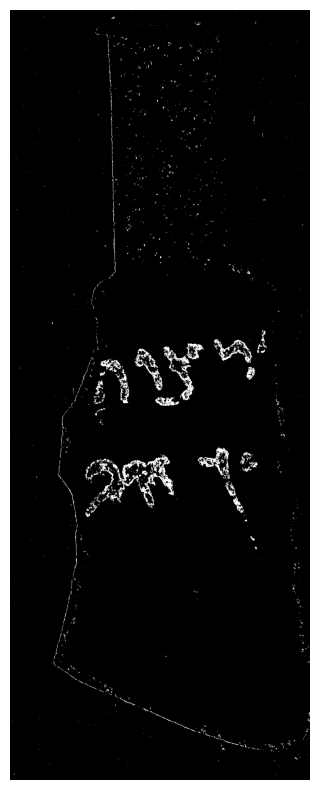

True

In [ ]:
ink_mask = create_mask(i1, i12, [
 i1 > 96, i1 <= 142, i12 - i1 > 84, i12 - i1 <= 254
])

plt.figure(figsize=(10, 10))
plt.imshow(ink_mask, cmap='gray')
plt.axis('off')
plt.show()
cv2.imwrite('ink_14.png', ink_mask)

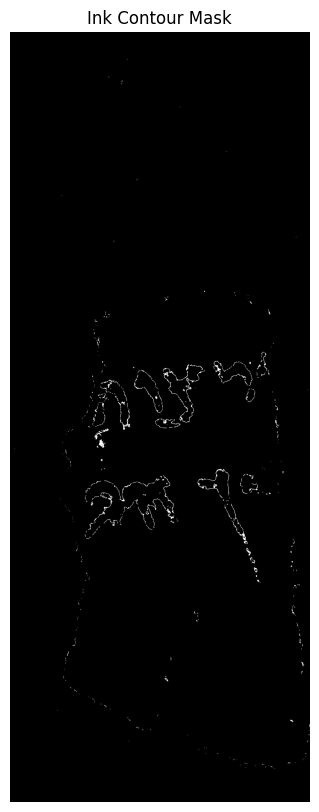

True

In [ ]:
ink_contour_mask = create_mask(i1, i12, [
 i1 > 92, i1 <= 155, i12 - i1 > 225, i12 - i1 <= 346
])

# Display the ink contour mask
plt.figure(figsize=(10, 10))
plt.imshow(ink_contour_mask, cmap='gray')
plt.axis('off')
plt.title("Ink Contour Mask")
plt.show()
cv2.imwrite('ink_contour_10.png', ink_contour_mask)

In [ ]:
import numpy as np
import cv2
import os
import pandas as pd

# Paths to images and masks
cropped_dir = '/content/drive/MyDrive/Colab Notebooks/icdar_ijdar_2025/cropped_124_001'
ink_masks_dir = "/content/drive/MyDrive/Colab Notebooks/icdar_ijdar_2025/ink_masks"
parchment_masks_dir = "/content/drive/MyDrive/Colab Notebooks/icdar_ijdar_2025/parchment_masks"

# Load the ink and parchment masks
ink_mask = cv2.imread(os.path.join(ink_masks_dir, "124_001.png"), cv2.IMREAD_GRAYSCALE)
parchment_mask = cv2.imread(os.path.join(parchment_masks_dir, "124_001.png"), cv2.IMREAD_GRAYSCALE)

# Load i1 and i12 bands
i1 = cv2.imread(os.path.join(cropped_dir, "124_001_001.tif"), cv2.IMREAD_UNCHANGED).astype(np.float64)
i12 = cv2.imread(os.path.join(cropped_dir, "124_001_012.tif"), cv2.IMREAD_UNCHANGED).astype(np.float64)
i12_minus_i1 = i12 - i1



In [ ]:

# Find the contours in the ink mask
contours, _ = cv2.findContours(ink_mask.astype(np.uint8), cv2.RETR_EXTERNAL, cv2.CHAIN_APPROX_SIMPLE)
contour_mask = np.zeros_like(ink_mask, dtype=np.uint8)
cv2.drawContours(contour_mask, contours, -1, color=1, thickness=1)

# Create the contour mask with the correct data type (uint8)
contour_mask = np.zeros_like(ink_mask, dtype=np.uint8)

# Draw contours onto the mask
cv2.drawContours(contour_mask, contours, -1, color=255, thickness=1)

# Extract pixel values for contour regions (using a mask with 255 values for contours)
contour_i1_values = i1[contour_mask == 255]
contour_diff_values = i12_minus_i1[contour_mask == 255]

# Calculate thresholds for contour intensities
contour_thresholds = {
    "i1": (np.percentile(contour_i1_values, 10), np.percentile(contour_i1_values, 90)),
    "i12_minus_i1": (np.percentile(contour_diff_values, 10), np.percentile(contour_diff_values, 90))
}

# Print the thresholds for ink contours
print("Ink Contour Thresholds for n=10:")
print(f"  i1 thresholds (10th-90th percentile): {contour_thresholds['i1']}")
print(f"  i12 - i1 thresholds (10th-90th percentile): {contour_thresholds['i12_minus_i1']}")


Ink Contour Thresholds for n=10:
  i1 thresholds (10th-90th percentile): (92.0, 155.0)
  i12 - i1 thresholds (10th-90th percentile): (225.0, 346.0)


In [ ]:

# Find the contours in the ink mask
contours, _ = cv2.findContours(ink_mask.astype(np.uint8), cv2.RETR_EXTERNAL, cv2.CHAIN_APPROX_SIMPLE)
contour_mask = np.zeros_like(ink_mask, dtype=np.uint8)
cv2.drawContours(contour_mask, contours, -1, color=1, thickness=1)

# Create the contour mask with the correct data type (uint8)
contour_mask = np.zeros_like(ink_mask, dtype=np.uint8)

# Draw contours onto the mask
cv2.drawContours(contour_mask, contours, -1, color=255, thickness=1)

# Extract pixel values for contour regions (using a mask with 255 values for contours)
contour_i1_values = i1[contour_mask == 255]
contour_diff_values = i12_minus_i1[contour_mask == 255]

# Calculate thresholds for contour intensities
contour_thresholds = {
    "i1": (np.percentile(contour_i1_values, 12), np.percentile(contour_i1_values, 88)),
    "i12_minus_i1": (np.percentile(contour_diff_values, 12), np.percentile(contour_diff_values, 88))
}

# Print the thresholds for ink contours
print("Ink Contour Thresholds for n=12:")
print(f"  i1 thresholds (10th-90th percentile): {contour_thresholds['i1']}")
print(f"  i12 - i1 thresholds (10th-90th percentile): {contour_thresholds['i12_minus_i1']}")

Ink Contour Thresholds for n=12:
  i1 thresholds (10th-90th percentile): (94.0, 150.0)
  i12 - i1 thresholds (10th-90th percentile): (231.0, 343.0)


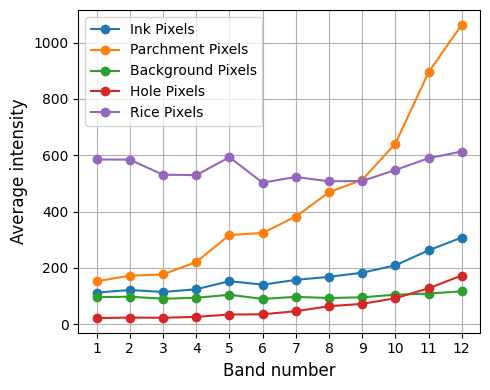

In [ ]:
import os
import cv2
import numpy as np
import matplotlib.pyplot as plt

# Path to the folder containing cropped band images
cropped_dir = '/content/drive/MyDrive/Colab Notebooks/icdar_ijdar_2025/cropped_124_001'

# Load band images and store them in a dictionary
bands = {}
for filename in sorted(os.listdir(cropped_dir)):
    if filename.endswith('.tif'):
        band_number = filename.split('_')[-1].split('.')[0]  # Extract band number
        image_path = os.path.join(cropped_dir, filename)
        bands[f"band_{band_number}"] = cv2.imread(image_path, cv2.IMREAD_UNCHANGED).astype(np.float64)

# Define coordinate points for each region
regions_coordinates = {
    "Ink": [(1720, 1890), (1500, 1900), (2000, 1890), (1650, 1900), (2000, 1600), (1750, 1900),
            (1700, 2150), (1600, 2270), (1900, 2420), (1800, 2680)],
    "Parchment": [(1700, 2600), (2600, 2000), (1700, 2800), (1500, 2600), (1100, 1500), (1700, 1200),
                  (1300, 1200), (2800, 1200), (2400, 1700), (2300, 2200)],
    "Background": [(2700, 2200), (800, 2700), (100, 2000), (700, 1200), (1400, 800), (2400, 300),
                   (500, 500), (300, 1500), (100, 2500), (1000, 2800)],
    "Hole": [(500, 2775), (505, 2777), (1310, 1330), (1305, 1340), (1330, 1400), (2280, 1500),
             (2300, 1530), (2300, 1545), (2275, 825), (2275, 840)],
    "Rice": [(2300, 800), (2516, 905), (1900, 800), (1400, 1200), (666, 1580), (1340, 2455),
             (1720, 2560), (430, 2415), (345, 2890), (1300, 2100)]
    #"Dark": [(1175, 840), (1555, 999), (1775, 911), (3070, 965), (2540, 2165), (2625, 1475),
    #         (2005, 865), (2910, 1350), (2530, 2045), (2600, 1710)]
}

# Extract the band numbers and sort them
band_numbers = sorted([int(band.split('_')[-1]) for band in bands.keys()])

# Calculate average intensity trends for each region
region_trends = {region: [] for region in regions_coordinates.keys()}

for band_number in band_numbers:
    band_key = f"band_{band_number:03}"
    band_image = bands[band_key]
    for region, coordinates in regions_coordinates.items():
        pixel_values = [band_image[y, x] for (x, y) in coordinates]  # Extract pixel values at given coordinates
        average_intensity = np.mean(pixel_values)
        region_trends[region].append(average_intensity)

# Plot the trends for each region
plt.figure(figsize=(5, 4))
for region, trends in region_trends.items():
    plt.plot(band_numbers, trends, label=f'{region} Pixels', marker='o')

plt.xlabel('Band number', fontsize='larger')
plt.ylabel('Average intensity', fontsize='larger')
plt.xticks(band_numbers)  # Ensure all band numbers are shown on the x-axis
plt.legend()
plt.grid(True)
plt.tight_layout()
plt.savefig('five_regions_ms_trends.png', dpi=300, format='png')
plt.show()


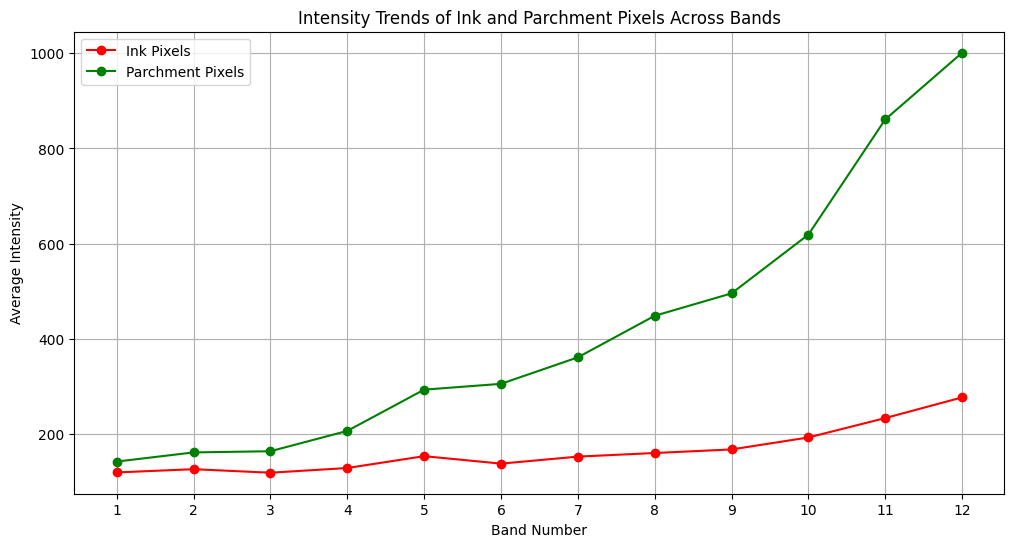

In [ ]:
import matplotlib.pyplot as plt

# Extract the band numbers and convert them to integers for sorting
band_numbers = sorted([int(band.split('_')[-1]) for band in bands.keys()])

# Initialize arrays to store average pixel intensities for each band for ink and parchment
ink_intensity_trends = []
parchment_intensity_trends = []

# Calculate the average pixel intensity for each band in the ink and parchment regions
for band_number in band_numbers:
    band_key = f"band_{band_number:03}"
    ink_intensity_trends.append(np.mean(bands[band_key][ink_mask > 0]))
    parchment_intensity_trends.append(np.mean(bands[band_key][parchment_mask > 0]))

# Plot the trends
plt.figure(figsize=(12, 6))
plt.plot(band_numbers, ink_intensity_trends, label='Ink Pixels', color='red', marker='o')
plt.plot(band_numbers, parchment_intensity_trends, label='Parchment Pixels', color='green', marker='o')
plt.xlabel('Band Number')
plt.ylabel('Average Intensity')
plt.title('Intensity Trends of Ink and Parchment Pixels Across Bands')
plt.xticks(band_numbers)  # Ensure all band numbers are shown on the x-axis
plt.legend()
plt.grid(True)
plt.show()


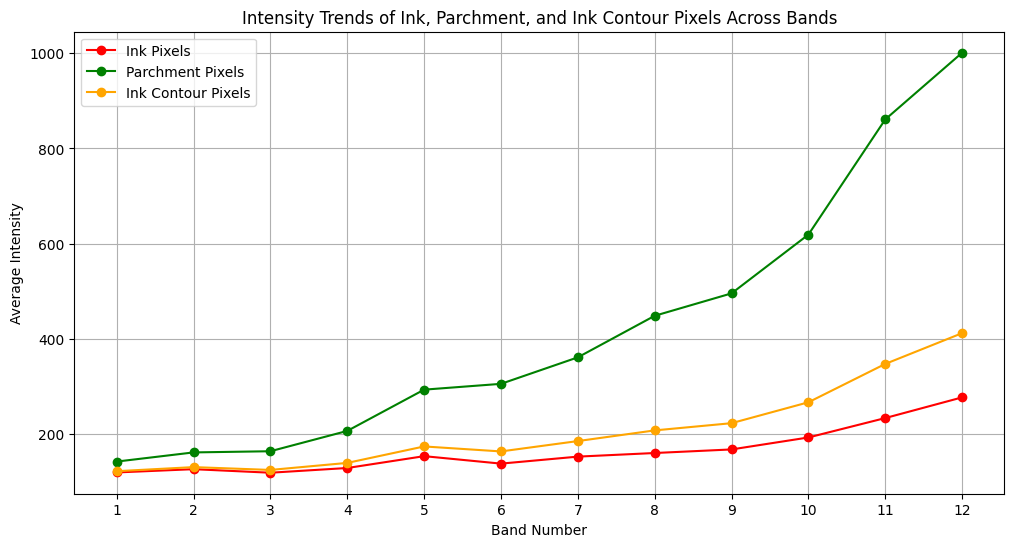

In [ ]:
# Create the contour mask with the correct data type (uint8)
contour_mask = np.zeros_like(ink_mask, dtype=np.uint8)
contours, _ = cv2.findContours(ink_mask.astype(np.uint8), cv2.RETR_EXTERNAL, cv2.CHAIN_APPROX_SIMPLE)
cv2.drawContours(contour_mask, contours, -1, color=255, thickness=1)

# Calculate the average pixel intensity for each band in the ink contour regions
ink_contour_intensity_trends = []

for band_number in band_numbers:
    band_key = f"band_{band_number:03}"
    ink_contour_intensity_trends.append(np.mean(bands[band_key][contour_mask == 255]))

# Plot the trends
plt.figure(figsize=(12, 6))
plt.plot(band_numbers, ink_intensity_trends, label='Ink Pixels', color='red', marker='o')
plt.plot(band_numbers, parchment_intensity_trends, label='Parchment Pixels', color='green', marker='o')
plt.plot(band_numbers, ink_contour_intensity_trends, label='Ink Contour Pixels', color='orange', marker='o')
plt.xlabel('Band Number')
plt.ylabel('Average Intensity')
plt.title('Intensity Trends of Ink, Parchment, and Ink Contour Pixels Across Bands')
plt.xticks(band_numbers)  # Ensure all band numbers are shown on the x-axis
plt.legend()
plt.grid(True)
plt.show()

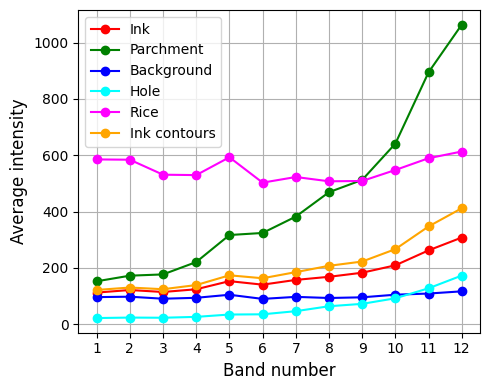

In [ ]:
import os
import cv2
import numpy as np
import matplotlib.pyplot as plt

# Paths
cropped_dir = '/content/drive/MyDrive/Colab Notebooks/icdar_ijdar_2025/cropped_124_001'
ink_mask_path = '/content/drive/MyDrive/Colab Notebooks/icdar_ijdar_2025/ink_masks/124_001.png'

# Load band images and store them in a dictionary
bands = {}
for filename in sorted(os.listdir(cropped_dir)):
    if filename.endswith('.tif'):
        band_number = filename.split('_')[-1].split('.')[0]  # Extract band number
        image_path = os.path.join(cropped_dir, filename)
        bands[f"band_{band_number}"] = cv2.imread(image_path, cv2.IMREAD_UNCHANGED).astype(np.float64)

# Define coordinate points for each region
regions_coordinates = {
    "Ink": [(1720, 1890), (1500, 1900), (2000, 1890), (1650, 1900), (2000, 1600), (1750, 1900),
            (1700, 2150), (1600, 2270), (1900, 2420), (1800, 2680)],
    "Parchment": [(1700, 2600), (2600, 2000), (1700, 2800), (1500, 2600), (1100, 1500), (1700, 1200),
                  (1300, 1200), (2800, 1200), (2400, 1700), (2300, 2200)],
    "Background": [(2700, 2200), (800, 2700), (100, 2000), (700, 1200), (1400, 800), (2400, 300),
                   (500, 500), (300, 1500), (100, 2500), (1000, 2800)],
    "Hole": [(500, 2775), (505, 2777), (1310, 1330), (1305, 1340), (1330, 1400), (2280, 1500),
             (2300, 1530), (2300, 1545), (2275, 825), (2275, 840)],
    "Rice": [(2300, 800), (2516, 905), (1900, 800), (1400, 1200), (666, 1580), (1340, 2455),
             (1720, 2560), (430, 2415), (345, 2890), (1300, 2100)]
}

# Extract the band numbers and sort them
band_numbers = sorted([int(band.split('_')[-1]) for band in bands.keys()])

# Define colors for each region, including "Ink Contours"
region_colors = {
    "Ink": "red",
    "Hole": "cyan",
    "Background": "blue",
    "Parchment": "green",
    "Rice": "magenta",
    "Ink contours": "orange"
}

# Calculate average intensity trends for each region
region_trends = {region: [] for region in regions_coordinates.keys()}

for band_number in band_numbers:
    band_key = f"band_{band_number:03}"
    band_image = bands[band_key]
    for region, coordinates in regions_coordinates.items():
        pixel_values = [band_image[y, x] for (x, y) in coordinates]  # Extract pixel values at given coordinates
        average_intensity = np.mean(pixel_values)
        region_trends[region].append(average_intensity)

# Load ink mask and create contour mask
ink_mask = cv2.imread(ink_mask_path, cv2.IMREAD_GRAYSCALE) > 0
contour_mask = np.zeros_like(ink_mask, dtype=np.uint8)
contours, _ = cv2.findContours(ink_mask.astype(np.uint8), cv2.RETR_EXTERNAL, cv2.CHAIN_APPROX_SIMPLE)
cv2.drawContours(contour_mask, contours, -1, color=255, thickness=1)

# Calculate the average intensity for each band in the ink contour regions
ink_contour_intensity_trends = []
for band_number in band_numbers:
    band_key = f"band_{band_number:03}"
    ink_contour_intensity_trends.append(np.mean(bands[band_key][contour_mask == 255]))

# Plot the trends for each region including the ink contour
plt.figure(figsize=(5,4))
for region, trends in region_trends.items():
    plt.plot(band_numbers, trends, label=region, color=region_colors[region], marker='o')
plt.plot(band_numbers, ink_contour_intensity_trends, label='Ink contours', color=region_colors["Ink contours"], marker='o')

plt.xlabel('Band number', fontsize='larger')
plt.ylabel('Average intensity', fontsize='larger')
plt.xticks(band_numbers)  # Ensure all band numbers are shown on the x-axis
plt.legend()
plt.grid(True)
plt.tight_layout()
plt.savefig('five_regions_with_ink_contour_ms_trends.png', dpi=300, format='png')
plt.show()
